<center><img src="picture.jpg" width="600" height="500" /></center>

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Input
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Single Element

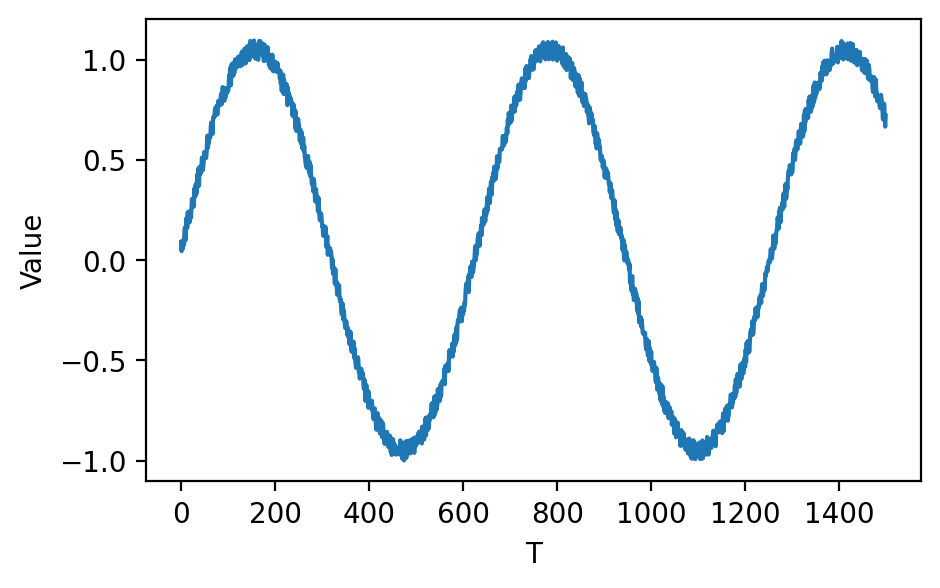

In [5]:
# Generate an array of values from 0 to 1500 with a step size of 1
t = np.arange(0, 1500)

# Generate an array of sine values for each value in t
x = np.sin(0.01*t)+(np.random.rand(1500,)/10)

# Create a new figure with a size of 5x3 inches and a resolution of 200 dpi
plt.figure(figsize=(5, 3), dpi=200)

# Plot the values of x
plt.plot(t,x)

# Label the x-axis as 'T'
plt.xlabel('T')

# Label the y-axis as 'Value'
plt.ylabel('Value')

# Display the plot
plt.show()

In [6]:
# Split data to train and test
interval=1000
train,test = x[0:interval], x[interval:]

# train= x[0:interval]
# test=x[interval:]

step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


In [56]:
# Reshaping the trainX and testX arrays
# Now, the trainX array will have the shape (number of samples, number of timesteps, 1)
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))


# Printing the shape of the trainX and testX arrays
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


In [57]:
print(trainY.shape)
print(testY.shape)

(990,)
(490,)


In [69]:
# Creating a Sequential model
model = Sequential()

# Adding a SimpleRNN layer to the model with 64 units, tanh activation function, and input shape of (10,1)
model.add(SimpleRNN(units=64, activation="tanh",return_sequences=True, input_shape=(10,1)))

# Adding a SimpleRNN layer to the model with 128 units.
model.add(SimpleRNN(units=128, activation="tanh"))

# Adding a Dense layer with 1 neuron to the model
model.add(Dense(1))

# Compiling the model with mean squared error loss function and rmsprop optimizer
model.compile(loss='mean_squared_error', optimizer='Adamax',metrics=['mae'])

# Printing the model summary
model.summary()



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (None, 10, 64)            4224      
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 128)               24704     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(trainX,trainY, epochs=20, batch_size=16,validation_data=(testX,testY))

Epoch 1/20
62/62 [==============================] - 4s 39ms/step - loss: 0.0455 - mae: 0.1424 - val_loss: 0.0060 - val_mae: 0.0648
Epoch 2/20
62/62 [==============================] - 2s 34ms/step - loss: 0.0040 - mae: 0.0520 - val_loss: 0.0027 - val_mae: 0.0426
Epoch 3/20
62/62 [==============================] - 2s 36ms/step - loss: 0.0023 - mae: 0.0389 - val_loss: 0.0019 - val_mae: 0.0360
Epoch 4/20
62/62 [==============================] - 2s 36ms/step - loss: 0.0018 - mae: 0.0344 - val_loss: 0.0016 - val_mae: 0.0330
Epoch 5/20
62/62 [==============================] - 2s 35ms/step - loss: 0.0016 - mae: 0.0328 - val_loss: 0.0016 - val_mae: 0.0324
Epoch 6/20
62/62 [==============================] - 2s 35ms/step - loss: 0.0015 - mae: 0.0322 - val_loss: 0.0016 - val_mae: 0.0333
Epoch 7/20
62/62 [==============================] - 2s 32ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0015 - val_mae: 0.0323
Epoch 8/20
62/62 [==============================] - 2s 36ms/step - loss: 0.0013 - m

In [71]:
predict=model.predict(testX)
predict.shape

(490, 1)

In [72]:
model.evaluate(testX,testY)

16/16 [==============================] - 0s 8ms/step - loss: 0.0013 - mae: 0.0299


[0.001317475689575076, 0.02987341210246086]

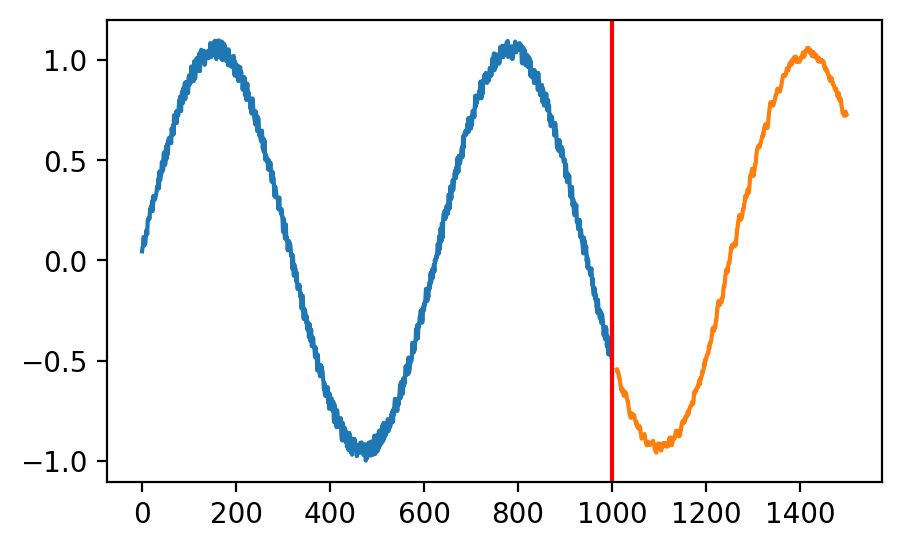

In [73]:
# Create a list of indexes for the new data points that start from (interval+step) and go up to 1500
x_new_indexes = [i for i in range(interval+step, 1500)]

# Use the fitted model (regr) to make predictions on the training data (trainX)
trainPredict = model.predict(trainX)

# Use the fitted model (regr) to make predictions on the testing data (testX)
testPredict = model.predict(testX)

# Concatenate the prediction results for both the training and testing data
predicted = np.concatenate((trainPredict, testPredict), axis=0)

# Creat a Figure
plt.figure(figsize=(5,3),dpi=200)
# Plot the original data for the range from 0 to interval
plt.plot(x[0:interval])

# Plot the predicted data for the range starting from x_new_indexes and the corresponding predicted values from interval-step onwards
plt.plot(x_new_indexes, predicted[interval-step:])

# Add a vertical line at the interval point to separate the training and testing data
plt.axvline(interval, c="r")

# Display the plot
plt.show()


In [76]:
########################################   Functional Mode    ###############################################
def create_model(input_shape):
  # Creating an Input layer with shape (batch_size, timesteps, input_dim)
  input_layer = tf.keras.Input(shape=input_shape)

  # Adding a SimpleRNN layer to the model with 64 units, tanh activation function
  rnn_layer = tf.keras.layers.SimpleRNN(units=64, activation="tanh")(input_layer)

  # Adding a Dense layer with 1 neuron
  dense_layer = tf.keras.layers.Dense(1)(rnn_layer)

  # Creating the model
  model = tf.keras.Model(inputs=input_layer, outputs=dense_layer)

  # Compiling the model with mean squared error loss function and rmsprop optimizer
  model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae'])

  # Printing the model summary
  model.summary()

  # Returning the created model
  return model

In [77]:
model=create_model((10,1))


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, 64)                4224      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [1]:
history = model.fit(trainX,trainY, epochs=20, batch_size=16,validation_data=(testX,testY))

NameError: name 'model' is not defined

# Multi Element

In [79]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, SimpleRNN, Input
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [80]:
csv_path = "E:/Deep Course/Weeks/W8/Data/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [81]:
df.shape

(420551, 15)

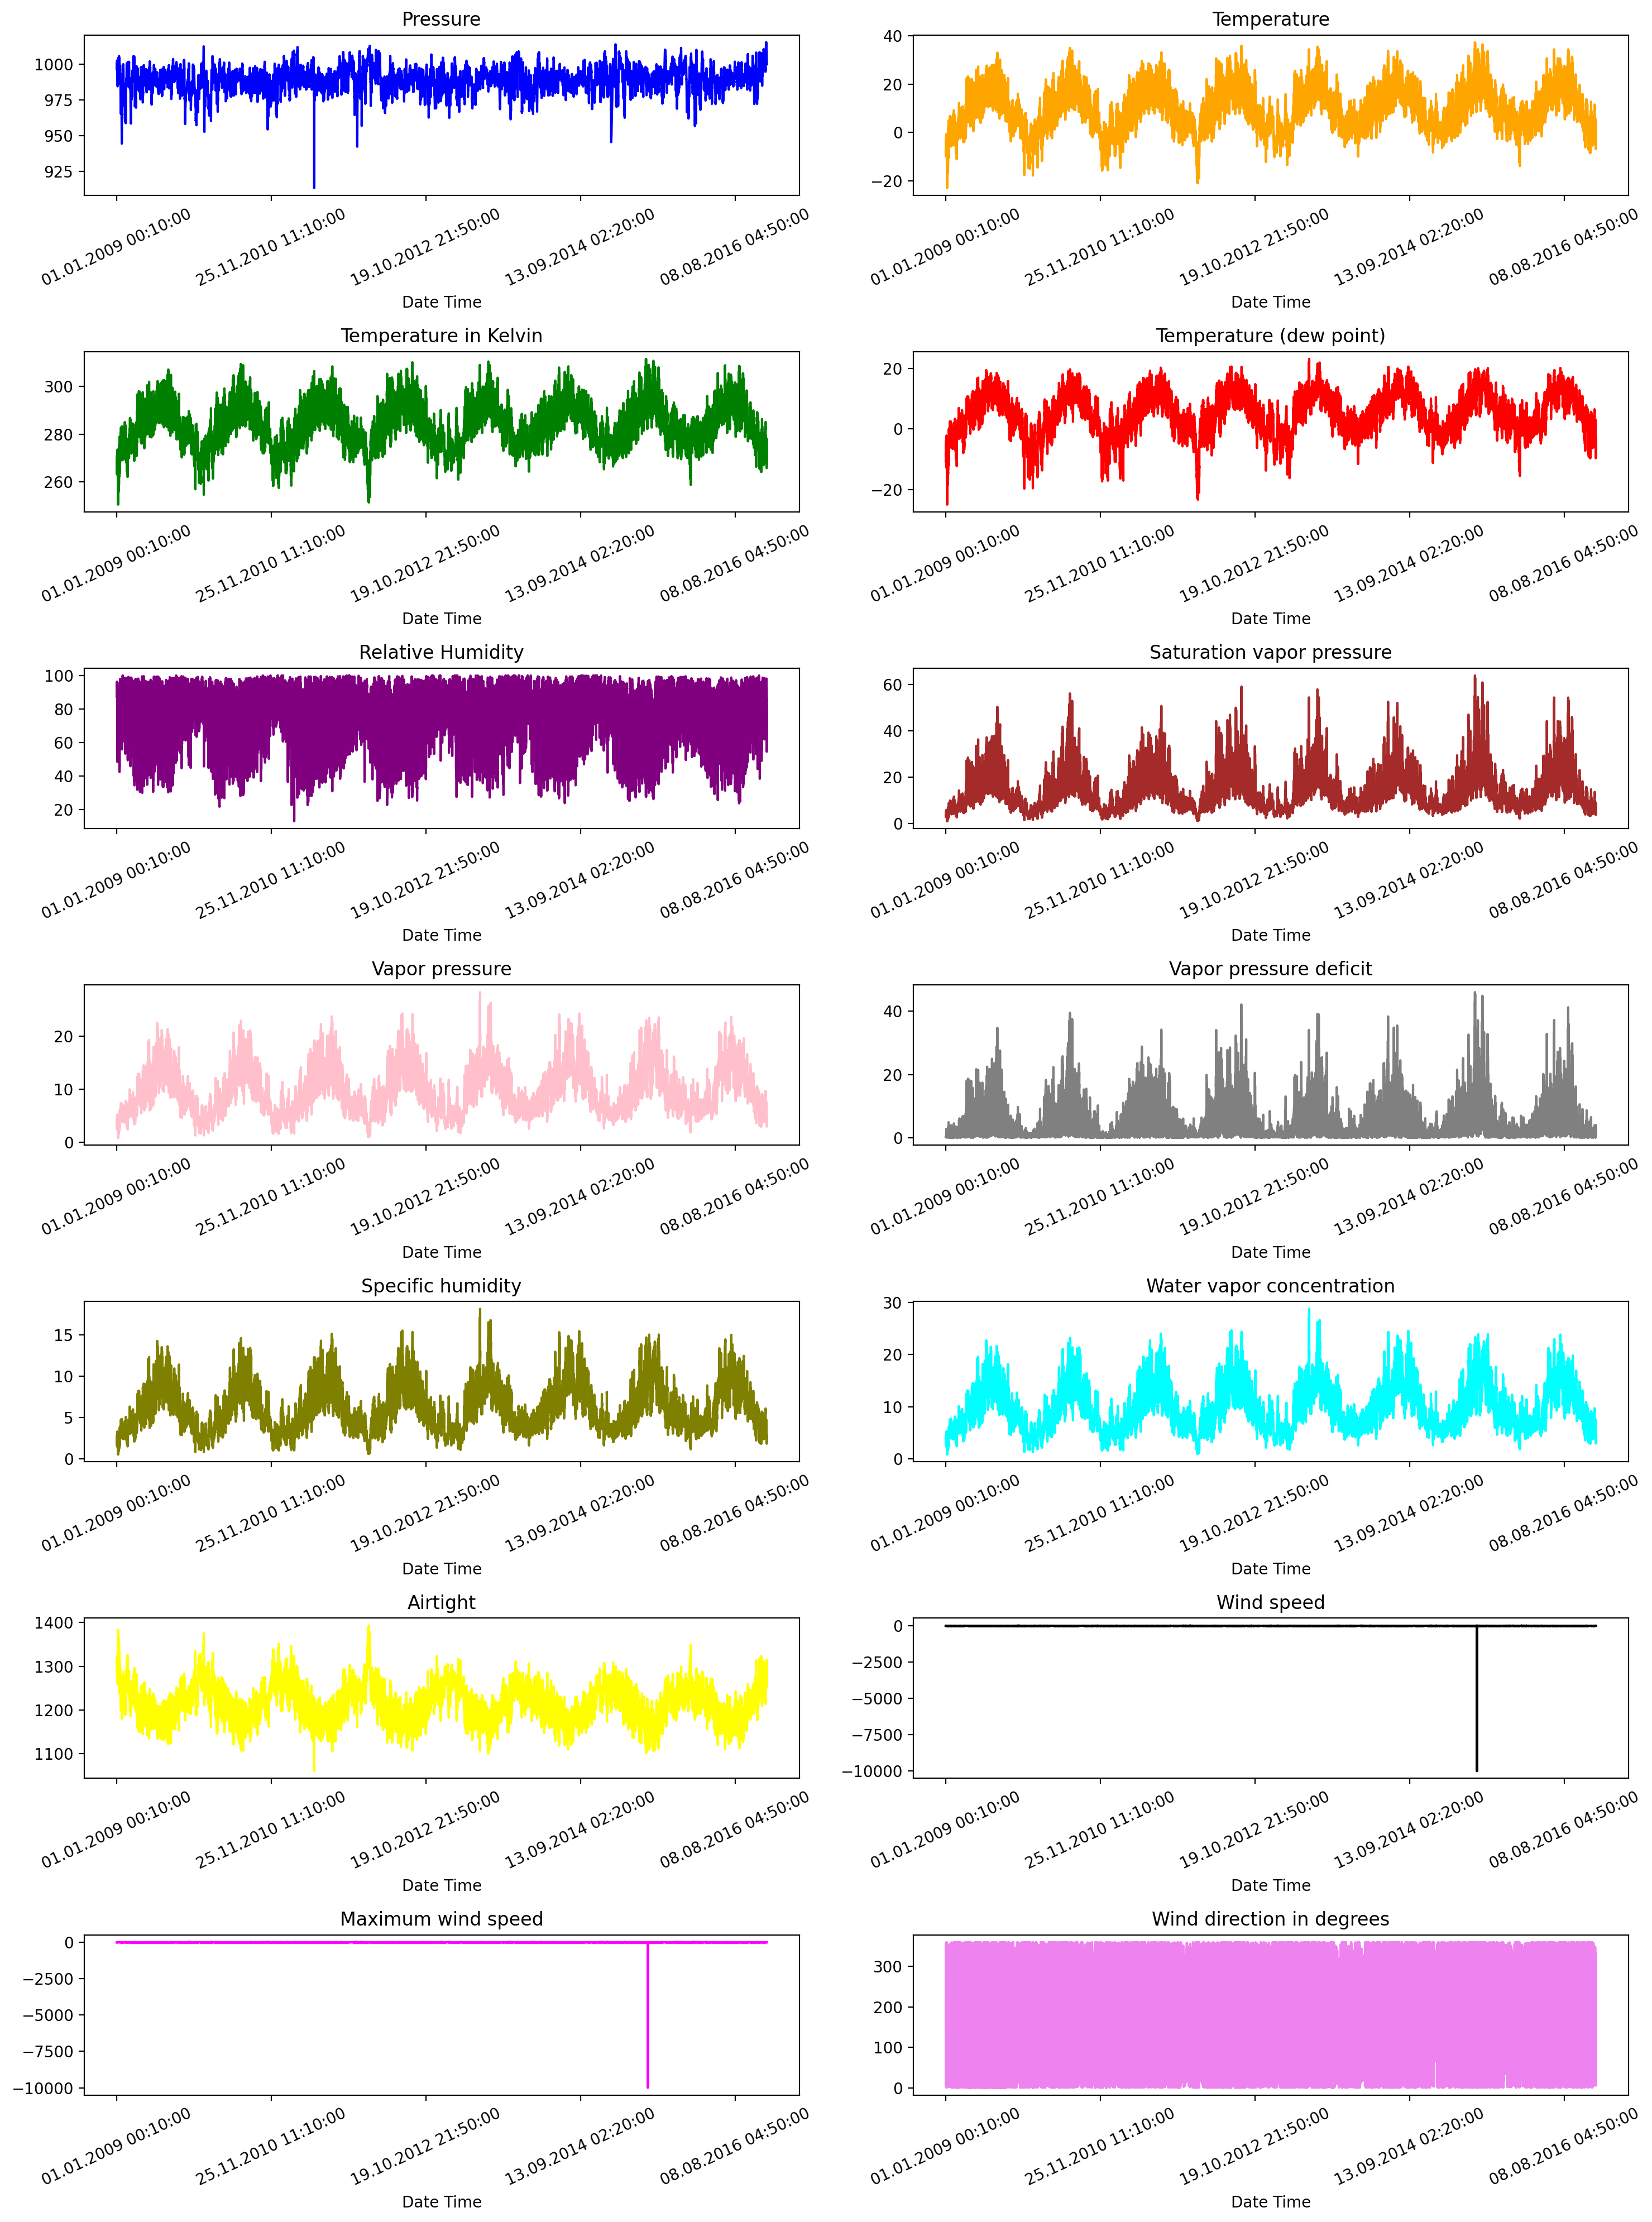

In [96]:
 # List of titles for each plot
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

# List of feature keys corresponding to each plot
feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

# List of colors for each plot
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "yellow",
    "black",
    "magenta",
    "violet",
]

# Extracting the time data from the dataframe
time_data = df["Date Time"]

# Creating the figure for the plots
plt. figure(figsize=(15,20),dpi=200)

# Variable to keep track of the plot number
c=1

# Creating the subplots and plotting the data for each feature key
for i in range(7):
    for j in range(2):
        
        # Getting the current feature key and corresponding data
        key=feature_keys[c-1]
        t_data = df[key]
        t_data.index = time_data
        
        # Creating the subplot and plotting the data
        plt. subplot(7,2,c)
        t_data. plot(color=colors[c-1],rot=25,title=titles[c-1])
        
        c=c+1
        
# Adjusting the layout and displaying the plots
plt. tight_layout()
plt. show()

In [97]:
step=10
n_samples=df.shape[0]-step

input_features = [
    "p (mbar)",
    "T (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

n_variables=len(input_features)
input_array=np.zeros((n_samples,step,n_variables),dtype='float32')
label_array=np.zeros((n_samples,1),dtype='float32')

def normalize(data):

    data=np.array(data)
    
    data_mean = data.mean()
    data_std = data.std()
    return (data - data_mean) / data_std


# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step

        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y)

c=0
for f in input_features:

    input_=list(df[f])

    input_=normalize(input_)
    
    trainX,trainY =convertToDataset(input_,step)

    
    input_array[:,:,c]=trainX

    if f=="T (degC)":
        
        input_=list(df[f])
        trainX,trainY =convertToDataset(input_,step)
        
        label_array=trainY
        
    c=c+1
  

In [99]:
print(label_array.shape)
print(input_array.shape)

(420541,)
(420541, 10, 12)


In [100]:
train_percentatge=0.95
split_index=int(input_array.shape[0]*train_percentatge)


trainX=input_array[0:split_index]
trainY=label_array[0:split_index]

testX=input_array[split_index:]
testY=label_array[split_index:]

print('TrainX',trainX.shape)
print('TestX',testX.shape)
print('TrainY',trainY.shape)
print('TestY',testY.shape)

TrainX (399513, 10, 12)
TestX (21028, 10, 12)
TrainY (399513,)
TestY (21028,)


In [101]:
########################################   Functional Mode    ###############################################
def create_model(input_shape):
  # Creating an Input layer with shape (batch_size, timesteps, input_dim)
  input_layer = tf.keras.Input(shape=input_shape)

  # Adding a SimpleRNN layer to the model with 64 units, tanh activation function
  rnn_layer = tf.keras.layers.SimpleRNN(units=64, activation="tanh")(input_layer)

  # Adding a Dense layer with 1 neuron
  dense_layer = tf.keras.layers.Dense(1)(rnn_layer)

  # Creating the model
  model = tf.keras.Model(inputs=input_layer, outputs=dense_layer)

  # Compiling the model with mean squared error loss function and rmsprop optimizer
  model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae'])

  # Printing the model summary
  model.summary()

  # Returning the created model
  return model

In [102]:
trainX.shape

(399513, 10, 12)

In [106]:
input_tensor=trainX.shape[1:]

model=create_model(input_tensor)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, 64)                4928      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(trainX,trainY, epochs=20, batch_size=2000,validation_data=(testX,testY))

Epoch 1/20
200/200 [==============================] - 4s 16ms/step - loss: 34.0989 - mae: 3.6525 - val_loss: 7.1853 - val_mae: 1.3342
Epoch 2/20
200/200 [==============================] - 3s 15ms/step - loss: 1.9536 - mae: 0.7360 - val_loss: 0.8827 - val_mae: 0.6128
Epoch 3/20
200/200 [==============================] - 3s 15ms/step - loss: 0.4080 - mae: 0.4191 - val_loss: 0.2688 - val_mae: 0.3714
Epoch 4/20
200/200 [==============================] - 3s 15ms/step - loss: 0.2151 - mae: 0.3362 - val_loss: 0.1751 - val_mae: 0.3294
Epoch 5/20
200/200 [==============================] - 3s 15ms/step - loss: 0.1502 - mae: 0.2935 - val_loss: 0.1159 - val_mae: 0.2818
Epoch 6/20
200/200 [==============================] - 3s 16ms/step - loss: 0.1215 - mae: 0.2689 - val_loss: 0.1146 - val_mae: 0.2817
Epoch 7/20
200/200 [==============================] - 3s 15ms/step - loss: 0.1078 - mae: 0.2526 - val_loss: 0.0757 - val_mae: 0.2246
Epoch 8/20
200/200 [==============================] - 3s 15ms/step -